In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.linalg as linalg
import numpy as np
import scipy as scp


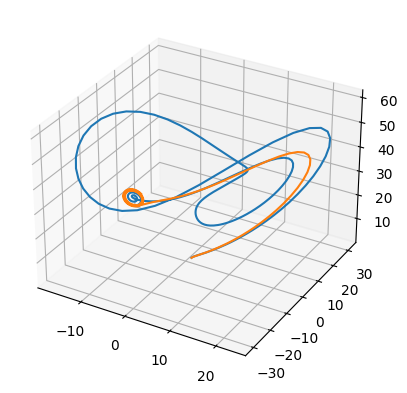

In [ ]:

def fx(x,y,z,t): return (sigma*(y-x))
def fy(x,y,z,t): return (x*(rho-z)-y)
def fz(x,y,z,t): return (x*y-beta*z)

def fx_neg(x,y,z,t): return -1*(sigma*(y-x))
def fy_neg(x,y,z,t): return -1*(x*(rho-z)-y)
def fz_neg(x,y,z,t): return -1*(x*y-beta*z)
#a) Defining the classical Runge-Kutta 4th order method

def RungeKutta4_forward(x,y,z,fx,fy,fz,t,h):
    k1x,k1y,k1z = ( h*f(x,y,z,t) for f in (fx,fy,fz) )
    # print( k1x,k1y,k1z)
    xs, ys,zs,ts = ( r+0.5*kr for r,kr in zip((x,y,z,t),(k1x,k1y,k1z,h)) )
    k2x,k2y,k2z = ( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    xs, ys,zs,ts = ( r+0.5*kr for r,kr in zip((x,y,z,t),(k2x,k2y,k2z,h)) )
    k3x,k3y,k3z = ( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    xs, ys,zs,ts = ( r+kr for r,kr in zip((x,y,z,t),(k3x,k3y,k3z,h)) )
    k4x,k4y,k4z  =( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    # print((r for r in (x,y,z)))
    return (r+(k1r+2*k2r+2*k3r+k4r)/6 for r,k1r,k2r,k3r,k4r in 
            zip((x,y,z),(k1x,k1y,k1z),(k2x,k2y,k2z),(k3x,k3y,k3z),(k4x,k4y,k4z)))

def RungeKutta4_backward(x,y,z,fx,fy,fz,t,h):
    k1x,k1y,k1z = ( h*f(x,y,z,t) for f in (fx,fy,fz) )
    # print( k1x,k1y,k1z)
    xs, ys,zs,ts = ( r+0.5*kr for r,kr in zip((x,y,z,t),(k1x,k1y,k1z,h)) )
    k2x,k2y,k2z = ( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    xs, ys,zs,ts = ( r+0.5*kr for r,kr in zip((x,y,z,t),(k2x,k2y,k2z,h)) )
    k3x,k3y,k3z = ( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    xs, ys,zs,ts = ( r+kr for r,kr in zip((x,y,z,t),(k3x,k3y,k3z,h)) )
    k4x,k4y,k4z  =( h*f(xs,ys,zs,ts) for f in (fx,fy,fz) )
    # print((r for r in (x,y,z)))
    return (r-(k1r+2*k2r+2*k3r+k4r)/6 for r,k1r,k2r,k3r,k4r in 
            zip((x,y,z),(k1x,k1y,k1z),(k2x,k2y,k2z),(k3x,k3y,k3z),(k4x,k4y,k4z)))

sigma=10.
beta=8./3.
rho=28.
tIn=3.
tFin=0.
h=-0.01
totalSteps=int(np.floor((tFin-tIn)/h))

t = totalSteps * [0.0]
x = totalSteps * [0.0]
y = totalSteps * [0.0]
z = totalSteps * [0.0]

x[0],y[0],z[0],t[0] = 1., 1., 1., 0.  #Initial condition
for i in range(1, totalSteps):
    x[i],y[i],z[i] = RungeKutta4_backward(x[i-1],y[i-1],z[i-1], fx_neg,fy_neg,fz_neg, t[i-1], -h)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y,z, "-")

tIn=0.
tFin=3.
h=0.01
totalSteps=int(np.floor((tFin-tIn)/h))
x[0],y[0],z[0],t[0] = 1., 1., 1., 0.  #Initial condition
for i in range(1, totalSteps):
    x[i],y[i],z[i] = RungeKutta4_forward(x[i-1],y[i-1],z[i-1], fx,fy,fz, t[i-1], h)

# ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y,z, "-")

-0.0 -0.26 0.016666666666666666
0.027593494613136316 -0.26608904467857813 0.01967581194860201
0.05913359277876811 -0.2801863611533805 0.022802661165344854
0.09594145671395769 -0.30358742699204516 0.02639790585157515
0.13963302511978917 -0.33797927682524304 0.030955236076132122
0.19219533053970925 -0.38552290471664097 0.03720409749605011
0.2560802320441338 -0.4489494062336407 0.046252062222715926
0.33431869298460337 -0.5316661564407977 0.059804670815854895
0.43065832530655335 -0.6378616229546933 0.08050523435888654
0.5497252833668054 -0.7725814698112545 0.11245855420228314
0.6972073635740279 -0.9417165881304485 0.16203261842406957
0.8800457075565497 -1.151780894698111 0.23907098086228537
1.1066027806701129 -1.4092364160504756 0.3586887245641714
1.3867349917442322 -1.7188991478848032 0.5438397982073732
1.7316229782483676 -2.080559523078017 0.8287553983364789
2.15307439213667 -2.4822887240008917 1.2629651331364533
2.6617762246803807 -2.8879544860661825 1.9144759287105633
3.26360796239831 

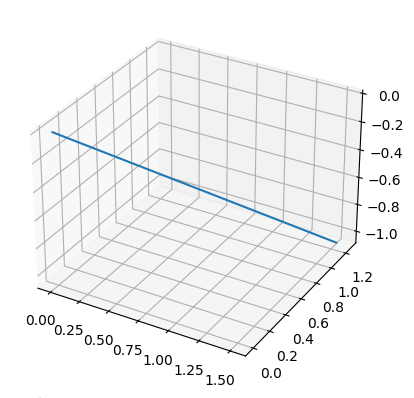

In [360]:
tIn=20.
tFin=0.
h=-0.01
totalSteps=int(np.floor((tFin-tIn)/h))

t = totalSteps * [0.0]
x = totalSteps * [0.0]
y = totalSteps * [0.0]
z = totalSteps * [0.0]

x[0],y[0],z[0],t[0] = 1., 1., 1., 0.  #Initial condition
for i in range(1, totalSteps):
    x[i],y[i],z[i] = RungeKutta4(x[i-1],y[i-1],z[i-1], fx,fy,fz, t[i-1], h)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y,z, "-")

In [287]:
t=np.linspace(20,0,100)
h=t[1]-t[0]
h

-0.20202020202020066

In [411]:
cov_obs= np.array([[1.,1.,0.],
                   [1.,2.,0.],
                   [0.,0., 2.]])
R_inv= np.linalg.inv(cov_obs)
def generate_true(xin, tin, pars):
  x = tin * [0.0]
  y = tin * [0.0]
  z = tin * [0.0]
  beta,sigma,rho = pars
  x[0],y[0],z[0],t[0] = xin[0], xin[1], xin[2], tin[0]  #Initial condition
  for i in range(1, len(tin)):
    dt= tin[i]- tin[i-1]
    x[i],y[i],z[i] = RungeKutta4_forward(x[i-1],y[i-1],z[i-1], fx,fy,fz, t[i-1], dt)
      
  list_of_vec= [[x[i], y[i], z[i]] for i in range(len(t))]
  return np.array(list_of_vec)
  

def nudge_forward(xin, time, pars, K, y_obs, H):

  store_vec= []
  # a, b, d, g = pars
  # x, y = xin
  vec= xin
  for t in range(1, len(time)):
    store_vec.append(vec)
    
    dt= time[t]-time[t-1]
    x,y,z= RungeKutta4_forward(vec[0],vec[1],vec[2], fx,fy,fz, time[t-1], dt)
    vec_new= np.array([x,y,z])
    gain_vec= K*H.T@R_inv@(y_obs[t].T- H@vec_new.T)

    gain_vec_dt= np.array(dt*gain_vec)[0]
    # print(dt*dvec)
    vec= vec_new + gain_vec_dt
    
  store_vec.append(vec)

  return np.array(store_vec)

def nudge_backward(x_tilda, time, pars, K_prime, y_obs, H):

  store_vec= []
  vec= x_tilda.copy()
  
  for t in range(len(time)-1, 0, -1):
    store_vec.append(vec)
    
    dt= (-time[t]+time[t-1])

    x,y,z= RungeKutta4_backward(vec[0],vec[1],vec[2], fx_neg,fy_neg,fz_neg, time[i-1], -dt)
    
    vec_new= np.array([x,y,z])
    gain_vec= K_prime*H.T@R_inv@(y_obs[t].T- H@vec_new.T)
    gain_vec_dt= np.array(dt*gain_vec)[0]
    # print(dt*dvec)
    vec= vec_new - gain_vec_dt
    
  store_vec.append(vec)

  return np.flip(store_vec, axis=0)


def back_forth_nudge(pars, t, K, K_back, H, y_obs, number_of_iterations): #once
  store_backward, store_forward=[], []
  #tilta, normal
  xin= np.mean(y_obs, axis=0)
  nudge= nudge_forward(xin, t, pars, K, y_obs, H)
  store_forward.append(nudge)
  for it in range(number_of_iterations):
    nudge_back= nudge_backward(nudge[-1], t, pars, K_back, y_obs, H)
    nudge= nudge_forward(nudge_back[0], t, pars, K, y_obs, H)
    store_backward.append(nudge_back)
    store_forward.append(nudge)
  return store_forward, store_backward

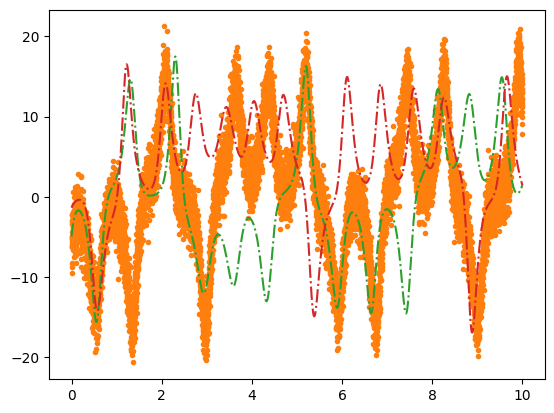

In [412]:
K, K_prime=0.5,0.5
xin= np.array([-5.34895656, -1.15005592, 28.92088666])
beta = 8.0/3;  sigma = 10.0;  rho = 28.0;
pars = (beta,sigma,rho)
H= np.eye(3)

cov_obs= np.array([[1.,1.,0.],
                   [1.,2.,0.],
                   [0.,0., 2.]])
r = 1


t= np.linspace(0,10,10000)
xtrue= generate_true(xin, t, pars)
y_obs= xtrue*0.0
for i in range(len(t)):
    y_obs[i] = H.dot(xtrue[i]) + 2*np.random.multivariate_normal(mean= [0,0,0], cov= cov_obs)

beta = 8.0/3;  sigma = 10.0;  rho = 28.0;
nudge= nudge_forward(y_obs[0], t, pars, K, y_obs, H)
nudge_back = nudge_backward(nudge[-1], t, pars, K_prime, y_obs, H)
# plt.plot(time[0:1000], xtrue[:,0][0:1000])
# plt.plot(time[0:1000], y_obs[:,0][0:1000], ".")
# plt.plot(time[0:1000], nudge[:,0][0:1000], ".-")
plt.plot(t, xtrue[:,0])
plt.plot(t, y_obs[:,0], ".")
plt.plot(t, nudge[:,0], "-.")
plt.plot(t, nudge_back[:,0], "-.")

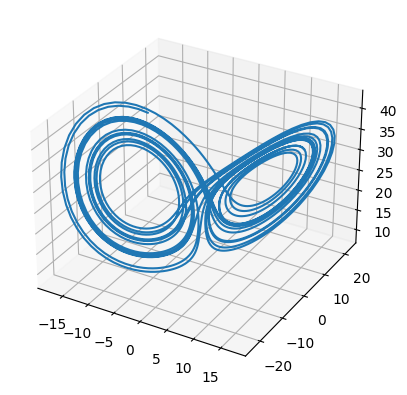

In [115]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y,z, "-")

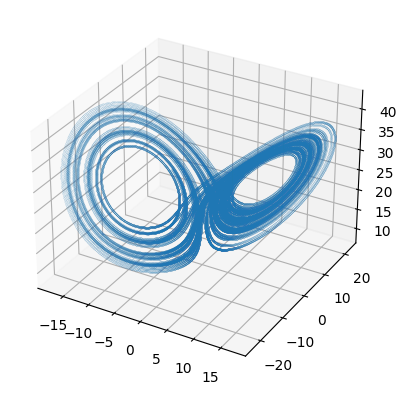

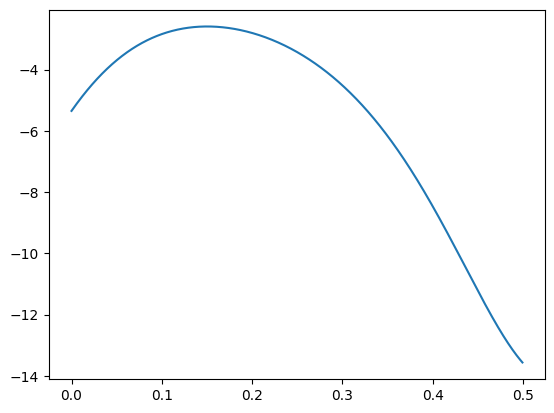

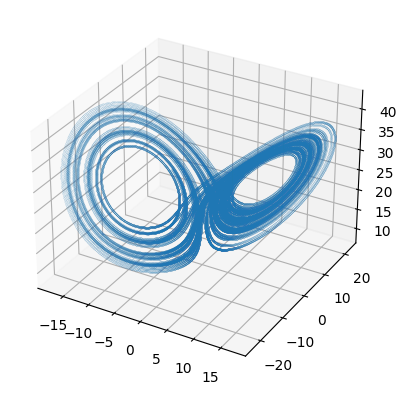

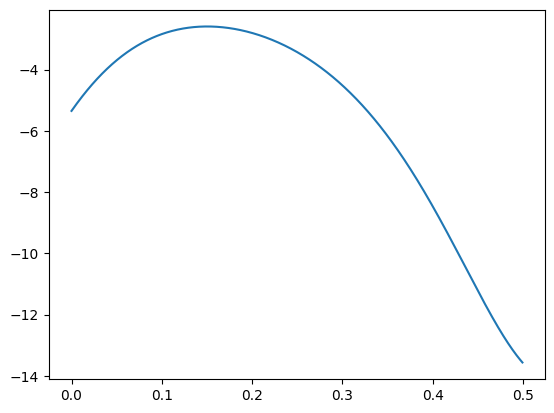

In [163]:
xin= np.array([-5.34895656, -1.15005592, 28.92088666])
t = np.linspace(0,50,100000)
beta = 8.0/3;  sigma = 10.0;  rho = 28.0;
pars = (beta,sigma,rho)
xtrue= generate_true(xin, t, pars)
    
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xtrue[:,0], xtrue[:,1],xtrue[:,2], ".", ms=0.1)
plt.show()
# plt.plot(t, xtrue[:,0])
plt.plot(t[0:1000], xtrue[:,0][0:1000])
plt.show()
xin= np.array([-5.34895656, -1.15005592, 28.92088666])
t = np.linspace(0,50,100000)
beta = 8.0/3;  sigma = 10.0;  rho = 28.0;
pars = (beta,sigma,rho)
xtrue= nudge_forward(xin, t, pars, 0, y_obs, H)
    
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xtrue[:,0], xtrue[:,1],xtrue[:,2], ".", ms=0.1)
plt.show()
# plt.plot(t, xtrue[:,0])
plt.plot(t[0:1000], xtrue[:,0][0:1000])
plt.show()

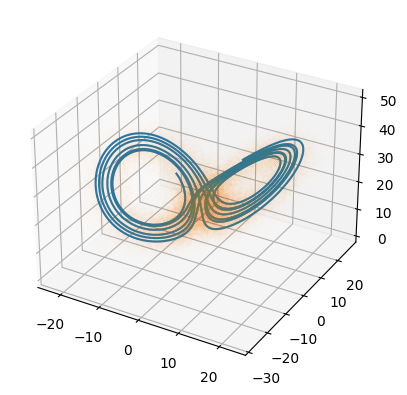

In [ ]:

    
    
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xtrue[:,0], xtrue[:,1],xtrue[:,2], "-", ms=0.1)
ax.plot(y_obs[:,0], y_obs[:,1],y_obs[:,2], '.', ms=0.01)
plt.show()

In [408]:
t = np.linspace(0,10,10000)
xin= np.array([1,1,1])
beta = 8.0/3;  sigma = 10.0;  rho = 28.0;
pars = (beta,sigma,rho)
H= np.eye(3)

cov_obs= np.array([[1.,1.,0.],
                   [1.,1.,0.],
                   [0.,0., 2.]])
r = 1

xtrue= generate_true(xin, t, pars)

K, K_prime=0,0
time = np.linspace(0,10,10000)

nudge= nudge_forward(xin, time, pars, K, y_obs, H)
nudge_back = nudge_backward(xtrue[-1], time, pars, K_prime, y_obs, H)

In [409]:
nudge_back

array([[-11.83632199, -18.73312705,  21.55675891],
       [-11.76720625, -18.67331809,  21.39484082],
       [-11.69801828, -18.61204909,  21.23451121],
       ...,
       [ -4.87950934,  -3.76883475,  24.59587308],
       [ -4.89097779,  -3.75626279,  24.64329407],
       [ -4.90268755,  -3.74387294,  24.69085811]])

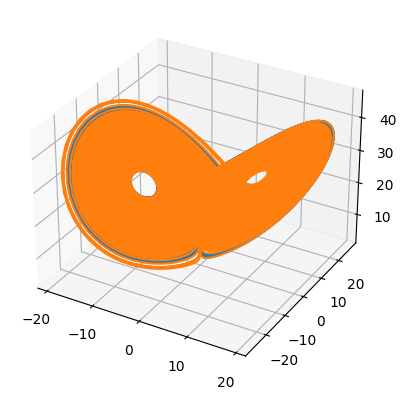

In [10]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xtrue[:,0], xtrue[:,1],xtrue[:,2], "-", ms=0.1)
ax.plot(nudge[:,0], nudge[:,1],nudge[:,2], "-", ms=0.1)


In [11]:
time

array([0.00000e+00, 5.00005e-04, 1.00001e-03, ..., 4.99990e+01,
       4.99995e+01, 5.00000e+01])

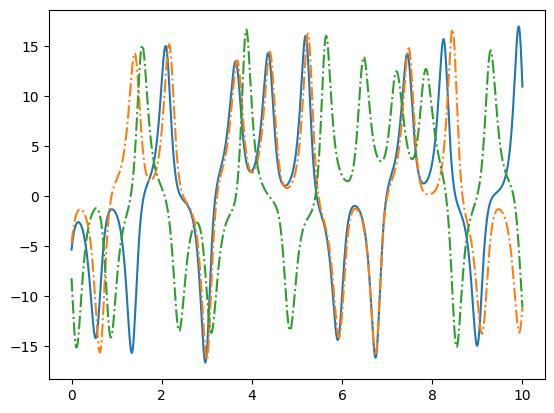

In [388]:

K, K_prime=0.5,-0.5

y_obs
t = np.linspace(0,10,10000)
beta = 8.0/3;  sigma = 10.0;  rho = 28.0;
nudge= nudge_forward(y_obs[0], t, pars, K, y_obs, H)
nudge_back = nudge_backward(nudge[-1], t, pars, K_prime, y_obs, H)
# plt.plot(time[0:1000], xtrue[:,0][0:1000])
# plt.plot(time[0:1000], y_obs[:,0][0:1000], ".")
# plt.plot(time[0:1000], nudge[:,0][0:1000], ".-")
plt.plot(time, xtrue[:,0])
# plt.plot(time, y_obs[:,0], ".")
plt.plot(time, nudge[:,0], "-.")
plt.plot(time, nudge_back[:,0], "-.")
# plt.plot(time[0:1000], nudge_back[:,0][0:1000], ".-")
# ax = plt.figure().add_subplot(projection='3d')
# ax.plot(nudge[:,0], nudge[:,1], nudge[:,2], ".", ms=0.1)

# plt.show()
# plt.plot(time[0:1000], nudge[:,0][0:1000], ".-")

In [420]:
t = np.linspace(0,3,10000)
xin= np.array([-5.34895656, -1.15005592, 28.92088666])
beta = 8.0/3;  sigma = 10.0;  rho = 28.0;
pars = (beta,sigma,rho)
H= np.eye(3)

cov_obs= np.array([[1.,1.,0.],
                   [1.,2.,0.],
                   [0.,0., 2.]])
r = 1

xtrue= generate_true(xin, t, pars)
y_obs= xtrue*0.0
for i in range(len(t)):
    y_obs[i] = H.dot(xtrue[i]) + 2*np.random.multivariate_normal(mean= [0,0,0], cov= cov_obs)
K, K_back= 50,100

store_for, store_back=  back_forth_nudge(pars, t, K, K_back, H, y_obs, 20)

In [390]:
x_nonudge= generate_true(y_obs[0], t, pars)

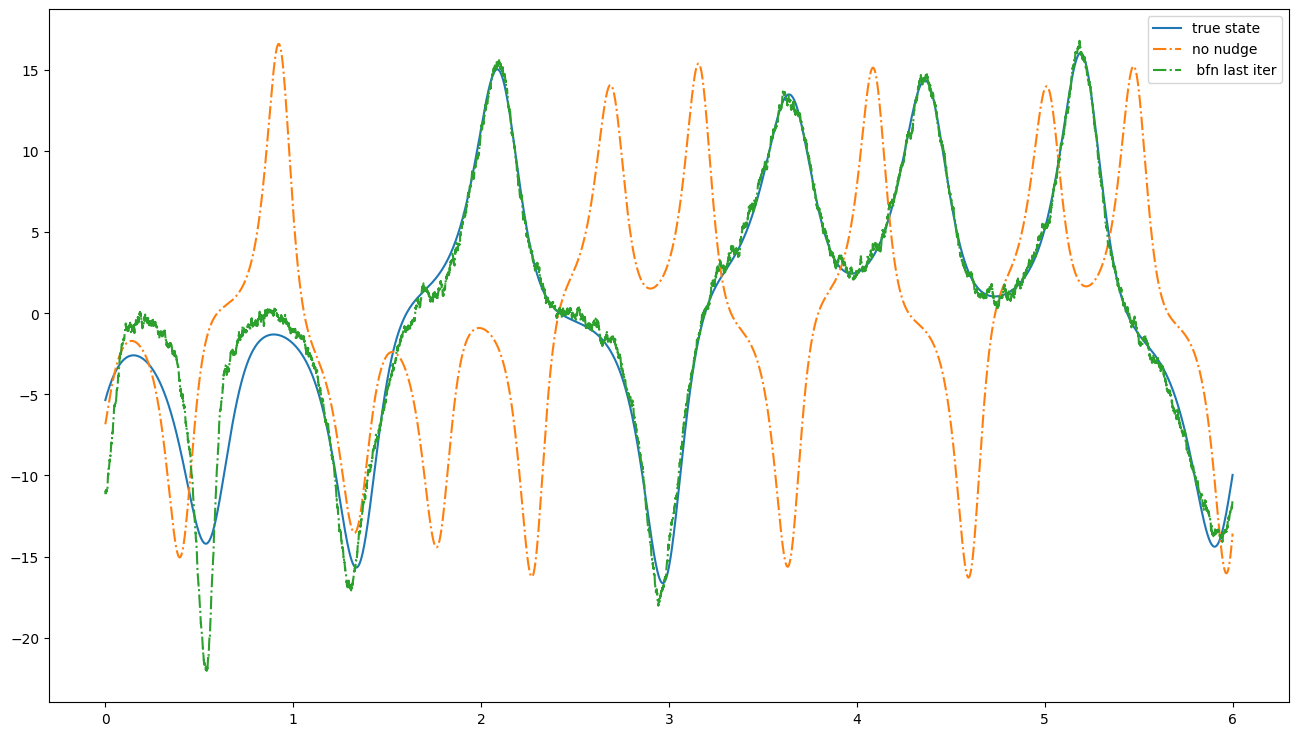

In [418]:
plt.figure(figsize= (16,9))
plt.plot(t, xtrue[:,0], label= "true state")
# plt.plot(time, y_obs[:,0], ".")
plt.plot(t, x_nonudge[:,0], "-.", label= "no nudge")
plt.plot(t, store_for[-1][:,0], "-.", label=" bfn last iter")
# plt.plot(t, store_back[-1][:,0], "-.")
plt.legend()


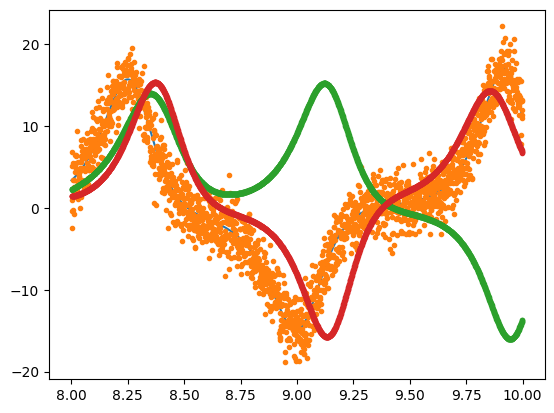

In [392]:
plt.plot(time[-2000:-1], xtrue[:,0][-2000:-1])
plt.plot(time[-2000:-1], y_obs[:,0][-2000:-1], ".")
plt.plot(time[-2000:-1], x_nonudge[:,0][-2000:-1], ".-")
plt.plot(time[-2000:-1], store_for[-1][:,0][-2000:-1], ".-")
# plt.plot(time[-2000:-1], store_back[-1][:,0][-2000:-1], ".-")

In [187]:
def rmse(x, y):
    return np.sqrt(np.mean(np.square(x-y)))

def given_true_traj_rmse(xtraj, xtrue):
    
    rmse_x=rmse(xtraj[:,0], xtrue[:,0])
    rmse_y=rmse(xtraj[:,1], xtrue[:,1])
    rmse_z=rmse(xtraj[:,2], xtrue[:,2])
    
    rmse_v= np.array([rmse_x, rmse_y, rmse_z])
    return rmse_v

def given_true_traj_rmse_t(xtraj, xtrue):
    rmse_t=[]
    for i in range(len(xtraj)):
        rmse_v= rmse(xtraj, xtrue)
        rmse_t.append(rmse_v)
    return rmse_t

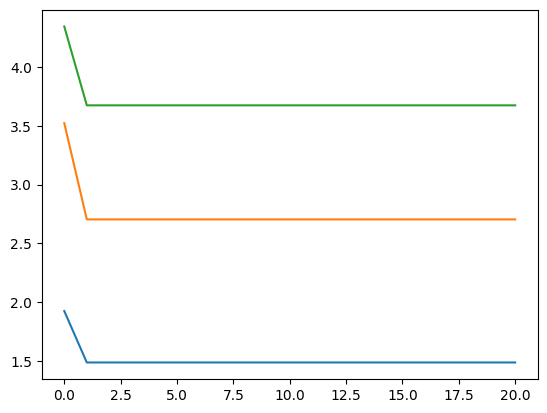

In [419]:
rmse_iter= [given_true_traj_rmse(traj[:], xtrue[:]) for traj in store_for]
plt.plot(rmse_iter)

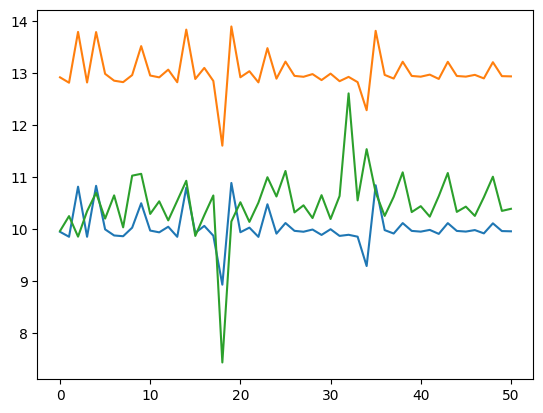

In [402]:
K, K_back= 2.0,2.0
store_for, store_back=  back_forth_nudge(pars, t, K, K_back, H, y_obs, 50)
rmse_iter= [given_true_traj_rmse(traj[:], xtrue[:]) for traj in store_for]
plt.plot(rmse_iter)

In [106]:
given_true_traj_rmse(store_for[0][1000:], xtrue[1000:])
# given_true_traj_rmse(x_nonudge[1000:], xtrue[1000:])

array([11.18782556, 12.71273734, 12.01584329])